# Satna proizvodnja električne energije iz solarnih elektrana

Za analizu satne proizvodnje električne energije iz solarnih elektrana korišteni su podaci dostupni na linku https://www.sunnyportal.com/Templates/PublicPagesPlantList.aspx sa filterima za BiH i snagu od 150 kWp. Sa navedenog portala se mogu preuzeti satni podaci za sve elektrane koje su u bazi, ali je preuzimanje podataka za neke elektrane izuzetno dugotrajan zadatak jer su satni podaci dati po danima, te bi bilo potrebno kopirati podatke za svaki dan u godini i pohranjivati ih u Excel fajl. Zbog toga je preuzimanje podataka izvršeno automatizacijom HTML koda za pojedine elektrane, s tim da HTML stranica skoro svake od elektrana ima određene postavke koje se razlikuju od ostalih, te su se kodovi morali povremeno mijenjati. 
Podaci za 2019., 2020. i 2021. godinu su preuzeti za FNE:
<br> FNE Krenica 1 - Grude
<br>  FNE Energetic Electronic - Čitluk
<br>  FNE Hodovo 1 - Stolac
<br> FNE "Čule promet" - Mostar
<br>  FNE Energy 1 - Usora 
<br>  Ove elektrane su izabrane sa kapacitetom većim od 150 kWp, te iz razloga što se nalaze u područjima sa najvećim brojem instalisanih elektrana (npr. Hodovo kod Stoca). 

# Analiza registra energetskih dozvola za navedene lokacije

Registar energetskih dozvola je preuzet sa web-stranice https://fmeri.gov.ba/registri/registar-energetskih-dozvola/, te su izbačeni podaci koji se odnose na energiju vode i vjetra. U opticaju su ostale male i velike solarne elektrane (osjenčene zelenim u .xslx. fajlu registar-ed-novembar-2021.xlsx - list: "Produzenje_solar"), s tim da nije jasno zašto su neki redovi potpuno zeleni, dok su za pojedine investitore podaci neosjenčeni. U obzir će se uzimati sve one FNE kod kojih su kolone sa energetskim dozvolama označene zelenim. 

*Napomena: S obzirom da su u Sunny portal bazi samo veće FNE sa područja FBiH, nije razmatran registar koji se odnosi na dozovole iz RS-a. U bazi postoje podaci za FNE na području opštine Pale, te Banjaluke i Prnjavora, ali su kapaciteti mali. Eventualno ukupna proizvodnja iz FNE sa područja RS-a se može nadodati u vidu vrijednosti na proračunatu sa izabranih lokacija u cilju dobijanja potpune slike za BiH.*

In [1]:
import pandas as pd
import numpy as np
import datetime as dt

In [2]:
def open_the_file(filename,sheets,num):
    filex=pd.read_excel(filename,sheets,header=num)
    return filex #otvaranje

In [26]:
registar=open_the_file(r"FILES\SOLAR\registar-ed-novembar-2021.xlsx",1,1)

U nastavku je prikazano prvih 10 FNE u fajlu registar kako bi se vidjela njegova forma.

In [30]:
registar.head(10)

,R.B.,Naziv i sjedište podnosioca zahtijeva,Identifikacijski broj podnosioca zahtijeva,Djelovodni broj i datum prijema zahtjeva,Datum upisa u registar,Datum kompletiranja zahtjeva,Broj Energetske dozvole,Broj Produžene Energetske dozvole,Datum isteka produžene Energetske dozvole,Naziv objekta,Lokacija,Snaga\n(MW),TEHNOLOGIJA
0,1,ENERETIC-ELECTRONIC d.o.o Međugorje,227228910006,UP/I-05-17-129/15,2015-03-10 00:00:00,2015-03-10 00:00:00,ED-4/14,ED-4-1/15,2016-06-12 00:00:00,ENERETIC-ELECTRONIC,Gos. zona Blizanci,0.149,izgrađena 5.8.2015
1,2,IGI SOLAR d.o.o. Čitluk,227738100009,UP/I-05-17-130/15,2015-03-10 00:00:00,2015-04-29 00:00:00,ED-2/14,ED-2-1/15,2016-06-12 00:00:00,Blizanci 1,Gos. zona Blizanci,0.149,izgrađena 06.7.2015
2,3,"ENERGOSOL d.o.o. Stolac, Aladinići bb",4227701100009,UP/I-05-17-131/15,2015-03-11 00:00:00,2015-03-11 00:00:00,ED-1/14,ED-1-1/15,12.06.2015.,Pješivac 1,HODOVO-STOLAC,0.149,izgrađena 08.6.2015
3,4,"GP TOMING d.o.o. Grude, Drinovci bb",4272031830006,UP/I-05-17-157/15,2015-03-19 00:00:00,2015-03-19 00:00:00,ED-7/14,ED-7-1/15,2016-06-20 00:00:00,KRENICA 2,Drinvci-Grude,0.149,izgrađena 28.8.2015
4,5,"GP TOMING d.o.o. Grude, Drinovci bb",4272031830006,UP/I-05-17-154/15,2015-03-19 00:00:00,2015-03-19 00:00:00,ED-8/14,ED-8-1/15,2016-06-20 00:00:00,KRENICA 3,Drinvci-Grude,0.149,izgrađena 28.8.2015
5,6,"GP TOMING d.o.o. Grude, Drinovci bb",4272031830006,UP/I-05-17-141/15,2015-03-19 00:00:00,2015-03-19 00:00:00,ED-9/14,ED-9-1/15,2016-06-20 00:00:00,HODOVO 2,Pješivac-Stolac,0.149,izgrađena 21.9.2015
6,7,"GP TOMING d.o.o. Grude, Drinovci bb",4272031830006,UP/I-05-17-142/15,2015-03-19 00:00:00,2015-03-19 00:00:00,ED-10/14,ED-10-1/15,2016-06-20 00:00:00,HODOVO 3,Pješivac-Stolac,0.149,izgrađena 21.9.2015
7,8,"GP TOMING d.o.o. Grude, Drinovci bb",4272031830006,UP/I-05-17-143/15,2015-03-19 00:00:00,2015-03-19 00:00:00,ED-11/14,ED-11-1/15,2016-06-20 00:00:00,HODOVO 4,Pješivac-Stolac,0.149,izgrađena 21.9.2015
8,9,"GP TOMING d.o.o. Grude, Drinovci bb",4272031830006,UP/I-05-17-144/15,2015-03-19 00:00:00,2015-03-19 00:00:00,ED-12/14,ED-12-1/15,2016-06-20 00:00:00,HODOVO 5,Pješivac-Stolac,0.149,izgrađena 21.9.2015
9,10,"GP TOMING d.o.o. Grude, Drinovci bb",4272031830006,UP/I-05-17-145/15,2015-03-19 00:00:00,2015-03-19 00:00:00,ED-13/14,ED-13-1/15,2016-06-20 00:00:00,HODOVO 6,Pješivac-Stolac,0.149,izgrađena 21.9.2015


In [31]:
registar[registar["Lokacija"].isnull()==True].index.values

array([139, 140], dtype=int64)

In [32]:
registar.loc[registar[registar["Lokacija"].isnull()==True].index.values,"Lokacija"]="Stolac" #za 2 FNE iz Stoca su ostavljena prazna
#mjesta za lokaciju, te će se ona dodijeliti

## Stolac

Prva od analiziranih lokacije je Stolac - uglavnom lokacija Hodovo, Pješivac.

In [125]:
registar_STOLAC=pd.DataFrame()
registar_STOLAC=registar[(registar["Lokacija"].str.contains("Stolac",case=False))|
                        (registar["Lokacija"].str.contains("Hodovo",case=False))|
                         (registar["Lokacija"].str.contains("PJEŠIVAC",case=False))]
print("Ukupno u Stocu:", len(registar_STOLAC))

Ukupno u Stocu: 64


In [124]:
registar_STOLAC["Lokacija"].unique()

array(['HODOVO-STOLAC', 'Pješivac-Stolac', 'PJEŠIVAC', 'HODOVO -STOLAC',
       'HODOVO -STO.', 'TRIJEBANJ-STOLAC', 'STOLAC', 'Hodovo', 'Stolac'],
      dtype=object)

Karakteristike postrojenja na ovom području su date u narednom prikazu. Kao što se može primijetiti, na ovom području su većinski zastupljena postrojenja snage (140 - 150) kW, izgrađena u periodu (2015. - 2021.). Kolona "Tehnologija" nije punjena ujednačeno, tako da nije za sve FNE dato vrijeme izgradnje. Tako se može vidjeti da je za neke FNE data oznaka SE ili mSE, a za neke je u istoj koloni dato vrijeme izgradnje. Na ovom području se nalaze četiri postrojenja snage od skoro 1 MW, te je potrebno izvršiti provjeru ako je moguće da li su ta postrojenja već izgrađena ili u izgradnji 

In [36]:
registar_STOLAC.groupby(["TEHNOLOGIJA","Snaga\n(MW)"])["Naziv objekta"].count()

TEHNOLOGIJA           Snaga\n(MW)
SE                    0.1000          1
                      0.1100          1
                      0.1490          3
                      0.1500          3
                      0.9990          4
izgrađena 01.02.2017  0.1490          1
izgrađena 01.02.2018  0.1490          4
                      0.1500          1
izgrađena 02.07.2021  0.1500          2
izgrađena 04.09.2019  0.1490          3
izgrađena 05.02.2018  0.1490          1
izgrađena 05.05.2016  0.1490          1
izgrađena 07.03.2018  0.1500          1
izgrađena 08.6.2015   0.1490          1
izgrađena 17.01.2018  0.1490          2
izgrađena 18.01.2018  0.1500          1
izgrađena 20.02.2018  0.1000          1
izgrađena 20.07.2020  0.0230          1
                      0.1500          1
izgrađena 20.10.2016  0.1490          1
izgrađena 20.12.2017  0.1490          2
izgrađena 21.9.2015   0.1490         13
izgrađena 25.07.2019  0.1490          1
izgrađena 28.05.2018  0.1490          1
      

Za 2/4 FNE od oko 1 MW u 2021. su kompletirani zahtjevi za izdavanje energetske dozvole, dok za druge dvije je to izvršeno u 2020. godini.

In [39]:
registar_STOLAC[registar_STOLAC["Snaga\n(MW)"]==0.9990]

,R.B.,Naziv i sjedište podnosioca zahtijeva,Identifikacijski broj podnosioca zahtijeva,Djelovodni broj i datum prijema zahtjeva,Datum upisa u registar,Datum kompletiranja zahtjeva,Broj Energetske dozvole,Broj Produžene Energetske dozvole,Datum isteka produžene Energetske dozvole,Naziv objekta,Lokacija,Snaga\n(MW),TEHNOLOGIJA
153,175,ECO-SWIS d.o.o. Mostar,4227802630009,UP/I-05-13-1-335/20,2020-07-03 00:00:00,2020-11-13 00:00:00,ED-426/19,ED-426-1/20,2023-05-15 00:00:00,"SE "" ECO SWIS 1""",HODOVO-STOLAC,0.999,SE
155,177,ECO-SWIS d.o.o. Mostar,4227802630009,UP/I-05-13-1-451/20,2020-08-20 00:00:00,2020-11-13 00:00:00,ED-425/19,ED-425-1/21,2023-05-15 00:00:00,"SE "" ECO SWIS 2""",HODOVO-STOLAC,0.999,SE
173,196,Energetica d.o.o. Sarajevo,4227802630009,UP/I-05-13-1-79/21,2021-02-12 00:00:00,2021-03-15 00:00:00,ED-426/19,ED-426-1/21,2021-05-15 00:00:00,"SE "" ECO SWIS 1""",HODOVO-STOLAC,0.999,SE
174,197,Energetica d.o.o. Sarajevo,4227802630009,UP/I-05-13-1-80/21,2021-02-12 00:00:00,2021-03-15 00:00:00,ED-425/19,ED-425-1/21,2021-05-15 00:00:00,"SE "" ECO SWIS 2""",HODOVO-STOLAC,0.999,SE


In [49]:
print(registar_STOLAC[pd.to_datetime(registar_STOLAC["Datum kompletiranja zahtjeva"]).dt.year>=2019][["Datum kompletiranja zahtjeva","Broj Energetske dozvole","Naziv objekta","Lokacija","Snaga\n(MW)"]])


    Datum kompletiranja zahtjeva Broj Energetske dozvole      Naziv objekta  \
95           2019-07-16 00:00:00               ED-375/19      SE  KAPITALIS   
96           2019-07-16 00:00:00               ED-378/19      SE ROYAL HUBL   
97           2019-07-16 00:00:00               ED-379/19           SE AN&AD   
126          2020-10-29 00:00:00               ED-427/19         ECO SWIS 3   
127          2020-10-29 00:00:00               ED-428/19         ECO SWIS 4   
128          2020-10-29 00:00:00               ED-429/19         ECO SWIS 5   
129          2020-10-29 00:00:00               ED-431/19         ECO SWIS 7   
130          2020-10-29 00:00:00               ED-432/19         ECO SWIS 8   
131          2020-10-29 00:00:00               ED-430/19         ECO SWIS 6   
132          2020-08-10 00:00:00               ED-445/19          MARSSEL Y   
133          2020-08-10 00:00:00               ED-444/19          MARSSEL X   
139          2020-07-17 00:00:00               ED-44

Na lokaciji okoline Stoca 4 FNE su izgrađene 2019., 3 u 2020.,te 8. u 2021. godini. Ovdje treba uključiti i četiri velike snage po 1 MW čiji period izgradnje nije dat, ali se po datumu kompletiranja zahtjeva za energetsku dozvolu može vidjeti da je to period 2019-2021. Također, može se primijetiti da te elektrane, snage od 1MW još uvijek nisu stavljene u listu kvalifikovanih proizvođača FERK-a, te se dalje neće razmatrati, kao ni one izgrađene u 2020. 

In [54]:
print("\nIzgrađene u 2019.:",len(registar_STOLAC[registar_STOLAC["TEHNOLOGIJA"].str.contains("2019")]))
print(registar_STOLAC[registar_STOLAC["TEHNOLOGIJA"].str.contains("2019")][["Naziv objekta","Lokacija", "Snaga\n(MW)","TEHNOLOGIJA","Datum kompletiranja zahtjeva"]])

print("\nIzgrađene u 2020.:",len(registar_STOLAC[registar_STOLAC["TEHNOLOGIJA"].str.contains("2020")]))
print(registar_STOLAC[registar_STOLAC["TEHNOLOGIJA"].str.contains("2020")][["Naziv objekta","Lokacija", "Snaga\n(MW)","TEHNOLOGIJA","Datum kompletiranja zahtjeva"]])

print("\nIzgrađene u 2021.",len(registar_STOLAC[registar_STOLAC["TEHNOLOGIJA"].str.contains("2021")]))
print(registar_STOLAC[registar_STOLAC["TEHNOLOGIJA"].str.contains("2021")][["Naziv objekta","Lokacija", "Snaga\n(MW)","TEHNOLOGIJA","Datum kompletiranja zahtjeva"]])


Izgrađene u 2019.: 4
   Naziv objekta       Lokacija  Snaga\n(MW)           TEHNOLOGIJA  \
85   SE  BREGAVA  HODOVO-STOLAC        0.149  izgrađena 25.07.2019   
86    Pješivac 3  HODOVO-STOLAC        0.149  izgrađena 04.09.2019   
91    Pješivac 2  HODOVO-STOLAC        0.149  izgrađena 04.09.2019   
92    Pješivac 4  HODOVO-STOLAC        0.149  izgrađena 04.09.2019   

   Datum kompletiranja zahtjeva  
85          2018-02-02 00:00:00  
86          2017-12-06 00:00:00  
91          2018-12-12 00:00:00  
92          2018-12-12 00:00:00  

Izgrađene u 2020.: 5
     Naziv objekta       Lokacija  Snaga\n(MW)           TEHNOLOGIJA  \
95   SE  KAPITALIS  HODOVO-STOLAC        0.149   izgrađena 30.1.2020   
96   SE ROYAL HUBL  HODOVO-STOLAC        0.149   izgrađena 30.1.2020   
97        SE AN&AD  HODOVO-STOLAC        0.149   izgrađena 30.1.2020   
139      Cicrina 2         Stolac        0.023  izgrađena 20.07.2020   
140      Cicrina 1         Stolac        0.150  izgrađena 20.07.2020   

  

In [53]:
print("Ukupno u Stocu, 2019.:", len(registar_STOLAC)-15-4)
print("Ukupno u Stocu, 2020.:", len(registar_STOLAC)-15-4)
print("Ukupno u Stocu, 2021.:", len(registar_STOLAC)-15-4)

Ukupno u Stocu, 2019.: 45
Ukupno u Stocu, 2020.: 45
Ukupno u Stocu, 2021.: 45


In [61]:
registar_STOLAC_summary=registar_STOLAC.drop(registar_STOLAC[(registar_STOLAC["TEHNOLOGIJA"].str.contains("2019"))|(registar_STOLAC["TEHNOLOGIJA"].str.contains("2020"))|(registar_STOLAC["Snaga\n(MW)"]==0.9990)].index)
registar_STOLAC_summary.groupby("Snaga\n(MW)")["Naziv objekta"].count()

Snaga\n(MW)
0.0225     1
0.0300     1
0.1000     2
0.1100     1
0.1460     1
0.1480     6
0.1490    30
0.1500     9
Name: Naziv objekta, dtype: int64

## Grude

Ukupna godišnja proizvodnja će se skalirati prema zbiru proizvodnje ovih elektrana. Rezolucija podataka je svakih 15 minuta za Krenicu1 i Hodovo1, odnosno 1 sat za Enelectronic, te će se izvršiti uzorkovanje na satnu rezoluciju. Tehnički podaci o FNE su dati na slikama:


In [127]:
registar_GRUDE=pd.DataFrame()
registar_GRUDE=registar[(registar["Lokacija"].str.contains("-Grude",case=False))|
                        (registar["Lokacija"].str.contains("Krenica",case=False))|
                       (registar["Lokacija"].str.contains("Grude",case=False))]
print("Ukupno u Grudama", len(registar_GRUDE))

Ukupno u Grudama 21


In [128]:
registar_GRUDE["Lokacija"].unique()

array(['Drinvci-Grude', 'GRUDE', 'Donji Mamići, GRUDE'], dtype=object)

Karakteristike postrojenja na ovom području su date u narednom prikazu. Kao što se može primijetiti, na ovom području su zastupljene mSE, te su 3 FNE snage u rangu (149 - 150) kWp, što je uporedivo sa onima na lokaciji Stoca.

In [64]:
registar_GRUDE.groupby(["TEHNOLOGIJA","Snaga\n(MW)"])["Naziv objekta"].count()

TEHNOLOGIJA            Snaga\n(MW)
izgrađena 08.06.2021   0.0225          1
                       0.1500          2
izgrađena 26.03.2021   0.0225          2
izgrađena 27.1.2020    0.1500          1
izgrađena 28.8.2015    0.1490          2
izgrađena 30.04.2020.  0.0225          2
izgrađena 31.03.2021   0.0225          1
mSE                    0.0225         10
Name: Naziv objekta, dtype: int64

In [17]:
print("\nIzgrađene u 2019.:",len(registar_GRUDE[registar_GRUDE["TEHNOLOGIJA"].str.contains("2019")]))
print(registar_GRUDE[registar_GRUDE["TEHNOLOGIJA"].str.contains("2019")][["Naziv objekta","Lokacija", "Snaga\n(MW)","TEHNOLOGIJA","Datum isteka produžene Energetske dozvole"]])

print("\nIzgrađene u 2020.:",len(registar_GRUDE[registar_GRUDE["TEHNOLOGIJA"].str.contains("2020")]))
print(registar_GRUDE[registar_GRUDE["TEHNOLOGIJA"].str.contains("2020")][["Naziv objekta","Lokacija", "Snaga\n(MW)","TEHNOLOGIJA","Datum isteka produžene Energetske dozvole"]])

print("\nIzgrađene u 2021.",len(registar_GRUDE[registar_GRUDE["TEHNOLOGIJA"].str.contains("2021")]))
print(registar_GRUDE[registar_GRUDE["TEHNOLOGIJA"].str.contains("2021")][["Naziv objekta","Lokacija", "Snaga\n(MW)","TEHNOLOGIJA","Datum isteka produžene Energetske dozvole"]])


Izgrađene u 2019.: 0
Empty DataFrame
Columns: [Naziv objekta, Lokacija, Snaga
(MW), TEHNOLOGIJA, Datum isteka produžene Energetske dozvole]
Index: []

Izgrađene u 2020.: 3
     Naziv objekta             Lokacija  Snaga\n(MW)            TEHNOLOGIJA  \
103  FNE "ELCOR 1"                GRUDE       0.1500    izgrađena 27.1.2020   
118    FNE "A SUN"  Donji Mamići, GRUDE       0.0225  izgrađena 30.04.2020.   
124    FNE "BIK 2"  Donji Mamići, GRUDE       0.0225  izgrađena 30.04.2020.   

    Datum isteka produžene Energetske dozvole  
103                       2020-02-19 00:00:00  
118                       2021-05-30 00:00:00  
124                       2021-05-30 00:00:00  

Izgrađene u 2021. 6
     Naziv objekta             Lokacija  Snaga\n(MW)           TEHNOLOGIJA  \
114  FNE "ELCOR 2"                GRUDE       0.0225  izgrađena 31.03.2021   
123    FNE "BIK 1"                GRUDE       0.0225  izgrađena 26.03.2021   
125    FNE "BIK 3"  Donji Mamići, GRUDE       0.0225  izgrađena

In [66]:
registar_GRUDE[(registar_GRUDE["Snaga\n(MW)"]==0.1490)|(registar_GRUDE["Snaga\n(MW)"]==0.1500)]

,R.B.,Naziv i sjedište podnosioca zahtijeva,Identifikacijski broj podnosioca zahtijeva,Djelovodni broj i datum prijema zahtjeva,Datum upisa u registar,Datum kompletiranja zahtjeva,Broj Energetske dozvole,Broj Produžene Energetske dozvole,Datum isteka produžene Energetske dozvole,Naziv objekta,Lokacija,Snaga\n(MW),TEHNOLOGIJA
3,4,"GP TOMING d.o.o. Grude, Drinovci bb",4272031830006,UP/I-05-17-157/15,2015-03-19 00:00:00,2015-03-19 00:00:00,ED-7/14,ED-7-1/15,2016-06-20 00:00:00,KRENICA 2,Drinvci-Grude,0.149,izgrađena 28.8.2015
4,5,"GP TOMING d.o.o. Grude, Drinovci bb",4272031830006,UP/I-05-17-154/15,2015-03-19 00:00:00,2015-03-19 00:00:00,ED-8/14,ED-8-1/15,2016-06-20 00:00:00,KRENICA 3,Drinvci-Grude,0.149,izgrađena 28.8.2015
103,119,ELCOR d.o.o. Grude,4272169940007,UP/I-05-17-637/19,2019-11-15 00:00:00,2019-11-15 00:00:00,ED-380/19,ED-380-1/20,2020-02-19 00:00:00,"FNE ""ELCOR 1""",GRUDE,0.150,izgrađena 27.1.2020
144,165,MIV d.o.o. Gude,4272108480003,UP/I-05-13/1-222/20,2020-04-24 00:00:00,2020-04-30 00:00:00,ED-473/19,ED-473-1/20,2021-07-26 00:00:00,MIV 2,GRUDE,0.150,izgrađena 08.06.2021
145,166,MIV d.o.o. Gude,4272108480003,UP/I-05-13/1-220/20,2020-04-24 00:00:00,2020-04-30 00:00:00,ED-472/19,ED-472-1/20,2021-07-26 00:00:00,MIV 1,GRUDE,0.150,izgrađena 08.06.2021


In [65]:
print("Ukupno u Grudama do 2019.:", len(registar_GRUDE)-9)
print("Ukupno u Grudama do 2020..", len(registar_GRUDE)-9)
print("Ukupno u Grudama do 2021.:", len(registar_GRUDE)-9)

Ukupno u Grudama do 2019.: 12
Ukupno u Grudama do 2020.. 12
Ukupno u Grudama do 2021.: 12


## Mostar

In [129]:
registar_MOSTAR=pd.DataFrame()
registar_MOSTAR=registar[registar["Lokacija"].str.contains("Mostar",case=False)]
print("Ukupno u Mostaru", len(registar_MOSTAR))

Ukupno u Mostaru 10


In [83]:
registar_MOSTAR

,R.B.,Naziv i sjedište podnosioca zahtijeva,Identifikacijski broj podnosioca zahtijeva,Djelovodni broj i datum prijema zahtjeva,Datum upisa u registar,Datum kompletiranja zahtjeva,Broj Energetske dozvole,Broj Produžene Energetske dozvole,Datum isteka produžene Energetske dozvole,Naziv objekta,Lokacija,Snaga\n(MW),TEHNOLOGIJA
20,21,ENERGONOVA d.o.o Sem.Semizovac bb,201397220001,UP/-05-17-213/15,2015-04-13 00:00:00,2015-06-26 00:00:00,ED-33/14,ED-33-1/15,2016-07-10 00:00:00,MERKUR-Vrapčići,Vrapčići-Mostar,0.115,izgrađena 20.6.2016
21,22,"MIMSINŽINJERING d.o.o S.,Semizovac bb,",201248900008,UP/-05-17-214/15,2015-04-13 00:00:00,2015-06-26 00:00:00,ED-31/14,ED-31-1/15,2016-07-10 00:00:00,KLAS CENTAR-Mostar,Bišća Polje bb-Mostar,0.115,izgrađena 24.6.2016
22,23,"SENDO d.o.o Sarajevo,Trg Heroja 35,",245039920007,UP/-05-17-215/15,2015-04-13 00:00:00,2015-06-26 00:00:00,ED-32/14,ED-32-1/15,2016-06-30 00:00:00,ZLATKA VUKOVIĆ,Opine-Mostar,0.104,izgrađena 02.9.2016
35,36,ČULE PROMET do.o. MOSTAR,227154450008,UP/I-05-17-492/15,2015-09-17 00:00:00,2015-09-17 00:00:00,ED-79/14,ED-79-1/16,2016-12-29 00:00:00,"FNE""ČULE PROMET""",ORTJEŠ-MOSTAR,0.149,izgrađena 26.9.2016
38,39,MIP d.o.o. MOSTAR,4227091940000,UP/I-05-17-507/15,2015-09-30 00:00:00,2015-12-15 00:00:00,ED-82/14,ED-82-1/16,2016-12-30 00:00:00,SE MIP,VRAPČIĆI MOSTAR,0.017,mSE
73,76,AUTO START d.o.o. Mostar,4227307460008,UP/I-05-17-506/16,2016-09-09 00:00:00,2016-10-11 00:00:00,ED-227/15,ED-227-1/16,2017-12-10 00:00:00,SE AUTO START,MOSTAR,0.150,izgrađena 12.02.2020
82,87,ELEKTROSAN d.o.o. Sarajevo,4263647440008,UP/I-05-17-426/17,2017-09-13 00:00:00,2017-11-07 00:00:00,ED-203/15,ED-203-1/18,2019-10-27 00:00:00,FNE PODVELEŽJE 1,MOSTAR,0.999,SE
93,104,AVACOM d.o.o. Mostar,4227598680000,UP/-05-17-96/19,2019-02-11 00:00:00,NaN,ED-322/18,2018-03-29 00:00:00,2019-03-29 00:00:00,FNE Radobolja 1,MOSTAR,0.150,SE
94,105,AVACOM d.o.o. Mostar,4227598680000,UP/-05-17-228/19,2019-03-28 00:00:00,NaN,ED-321/18,2018-03-29 00:00:00,2019-03-29 00:00:00,FNE Avacom,MOSTAR,0.015,mSE
100,116,NSSN d.o.o. Mostar,4227097390001,UP/I-05-17-519/19,2019-09-04 00:00:00,2019-12-09 00:00:00,ED-319/18,2018-03-05 00:00:00,2020-03-05 00:00:00,FNE Slipčići 992 kW,Slipčići Mostar,0.992,SE


In [69]:
registar_MOSTAR["Lokacija"].unique()

array(['Vrapčići-Mostar', 'Bišća Polje bb-Mostar', 'Opine-Mostar',
       'ORTJEŠ-MOSTAR', 'VRAPČIĆI  MOSTAR', 'MOSTAR', 'Slipčići Mostar'],
      dtype=object)

Karakteristike postrojenja na ovom području su date u narednom prikazu. Na lokaciji Mostara zastupljena su postrojenja snage od (100 - 150) kW, sa dvije velike FNE od po 1 MW, te će se provjeriti njihov period izgradnje.

In [71]:
registar_MOSTAR.groupby(["TEHNOLOGIJA","Snaga\n(MW)"])["Naziv objekta"].count()

TEHNOLOGIJA           Snaga\n(MW)
SE                    0.150          1
                      0.992          1
                      0.999          1
izgrađena 02.9.2016   0.104          1
izgrađena 12.02.2020  0.150          1
izgrađena 20.6.2016   0.115          1
izgrađena 24.6.2016   0.115          1
izgrađena 26.9.2016   0.149          1
mSE                   0.015          1
                      0.017          1
Name: Naziv objekta, dtype: int64

Nijedna od navedenih elektrana ispod se ne nalazi u FERK-ovom obrascu kvalifikovanih proizvođača.

In [73]:
registar_MOSTAR[(registar_MOSTAR["Snaga\n(MW)"]==0.992)|(registar_MOSTAR["Snaga\n(MW)"]==0.999)]

,R.B.,Naziv i sjedište podnosioca zahtijeva,Identifikacijski broj podnosioca zahtijeva,Djelovodni broj i datum prijema zahtjeva,Datum upisa u registar,Datum kompletiranja zahtjeva,Broj Energetske dozvole,Broj Produžene Energetske dozvole,Datum isteka produžene Energetske dozvole,Naziv objekta,Lokacija,Snaga\n(MW),TEHNOLOGIJA
82,87,ELEKTROSAN d.o.o. Sarajevo,4263647440008,UP/I-05-17-426/17,2017-09-13 00:00:00,2017-11-07 00:00:00,ED-203/15,ED-203-1/18,2019-10-27 00:00:00,FNE PODVELEŽJE 1,MOSTAR,0.999,SE
100,116,NSSN d.o.o. Mostar,4227097390001,UP/I-05-17-519/19,2019-09-04 00:00:00,2019-12-09 00:00:00,ED-319/18,2018-03-05 00:00:00,2020-03-05 00:00:00,FNE Slipčići 992 kW,Slipčići Mostar,0.992,SE


In [72]:
print("\nIzgrađene u 2019.:",len(registar_MOSTAR[registar_MOSTAR["TEHNOLOGIJA"].str.contains("2019")]))
print(registar_MOSTAR[registar_MOSTAR["TEHNOLOGIJA"].str.contains("2019")][["Naziv objekta","Lokacija", "Snaga\n(MW)","TEHNOLOGIJA","Datum isteka produžene Energetske dozvole"]])

print("\nIzgrađene u 2020.:",len(registar_MOSTAR[registar_MOSTAR["TEHNOLOGIJA"].str.contains("2020")]))
print(registar_MOSTAR[registar_MOSTAR["TEHNOLOGIJA"].str.contains("2020")][["Naziv objekta","Lokacija", "Snaga\n(MW)","TEHNOLOGIJA","Datum isteka produžene Energetske dozvole"]])

print("\nIzgrađene u 2021.",len(registar_MOSTAR[registar_MOSTAR["TEHNOLOGIJA"].str.contains("2021")]))
print(registar_MOSTAR[registar_MOSTAR["TEHNOLOGIJA"].str.contains("2021")][["Naziv objekta","Lokacija", "Snaga\n(MW)","TEHNOLOGIJA","Datum isteka produžene Energetske dozvole"]])


Izgrađene u 2019.: 0
Empty DataFrame
Columns: [Naziv objekta, Lokacija, Snaga
(MW), TEHNOLOGIJA, Datum isteka produžene Energetske dozvole]
Index: []

Izgrađene u 2020.: 1
    Naziv objekta Lokacija  Snaga\n(MW)           TEHNOLOGIJA  \
73  SE AUTO START   MOSTAR         0.15  izgrađena 12.02.2020   

   Datum isteka produžene Energetske dozvole  
73                       2017-12-10 00:00:00  

Izgrađene u 2021. 0
Empty DataFrame
Columns: [Naziv objekta, Lokacija, Snaga
(MW), TEHNOLOGIJA, Datum isteka produžene Energetske dozvole]
Index: []


In [76]:
print("Ukupno u Mostar do 2019.:", len(registar_MOSTAR)-3)
print("Ukupno u Mostar do 2020..", len(registar_MOSTAR)-3)
print("Ukupno u Mostar do 2021.:", len(registar_MOSTAR)-2)

Ukupno u Mostar do 2019.: 7
Ukupno u Mostar do 2020.. 7
Ukupno u Mostar do 2021.: 8


## Čitluk

In [89]:
registar[registar["Naziv i sjedište podnosioca zahtijeva"].str.contains("ELECTRONIC")]

,R.B.,Naziv i sjedište podnosioca zahtijeva,Identifikacijski broj podnosioca zahtijeva,Djelovodni broj i datum prijema zahtjeva,Datum upisa u registar,Datum kompletiranja zahtjeva,Broj Energetske dozvole,Broj Produžene Energetske dozvole,Datum isteka produžene Energetske dozvole,Naziv objekta,Lokacija,Snaga\n(MW),TEHNOLOGIJA
0,1,ENERETIC-ELECTRONIC d.o.o Međugorje,227228910006,UP/I-05-17-129/15,2015-03-10 00:00:00,2015-03-10 00:00:00,ED-4/14,ED-4-1/15,2016-06-12 00:00:00,ENERETIC-ELECTRONIC,Gos. zona Blizanci,0.149,izgrađena 5.8.2015


In [130]:
registar_CITLUK=pd.DataFrame()
registar_CITLUK=registar[(registar["Lokacija"].str.contains("Čitluk",case=False))
                        |(registar["Lokacija"].str.contains("Blizanci",case=False))]
print("Ukupno u Čitluku", len(registar_CITLUK))

Ukupno u Čitluku 7


In [92]:
registar_CITLUK["Lokacija"].unique()

array(['Gos. zona Blizanci', 'ČITLUK', 'Čitluk'], dtype=object)

Karakteristike postrojenja na ovom području su date u narednom prikazu. Kao što se može primijetiti, na ovom području su zastupljene 3 FNE  snage 149 kwP, te nekoliko malih mSE.

In [93]:
registar_CITLUK.groupby(["TEHNOLOGIJA","Snaga\n(MW)"])["Naziv objekta"].count()

TEHNOLOGIJA          Snaga\n(MW)
SE                   0.149          1
izgrađena 06.7.2015  0.149          1
izgrađena 5.8.2015   0.149          1
mSE                  0.023          4
Name: Naziv objekta, dtype: int64

In [94]:
print("\nIzgrađene u 2019.:",len(registar_CITLUK[registar_CITLUK["TEHNOLOGIJA"].str.contains("2019")]))
print(registar_CITLUK[registar_CITLUK["TEHNOLOGIJA"].str.contains("2019")][["Naziv objekta","Lokacija", "Snaga\n(MW)","TEHNOLOGIJA","Datum isteka produžene Energetske dozvole"]])

print("\nIzgrađene u 2020.:",len(registar_CITLUK[registar_CITLUK["TEHNOLOGIJA"].str.contains("2020")]))
print(registar_CITLUK[registar_CITLUK["TEHNOLOGIJA"].str.contains("2020")][["Naziv objekta","Lokacija", "Snaga\n(MW)","TEHNOLOGIJA","Datum isteka produžene Energetske dozvole"]])

print("\nIzgrađene u 2021.",len(registar_CITLUK[registar_CITLUK["TEHNOLOGIJA"].str.contains("2021")]))
print(registar_CITLUK[registar_CITLUK["TEHNOLOGIJA"].str.contains("2021")][["Naziv objekta","Lokacija", "Snaga\n(MW)","TEHNOLOGIJA","Datum isteka produžene Energetske dozvole"]])


Izgrađene u 2019.: 0
Empty DataFrame
Columns: [Naziv objekta, Lokacija, Snaga
(MW), TEHNOLOGIJA, Datum isteka produžene Energetske dozvole]
Index: []

Izgrađene u 2020.: 0
Empty DataFrame
Columns: [Naziv objekta, Lokacija, Snaga
(MW), TEHNOLOGIJA, Datum isteka produžene Energetske dozvole]
Index: []

Izgrađene u 2021. 0
Empty DataFrame
Columns: [Naziv objekta, Lokacija, Snaga
(MW), TEHNOLOGIJA, Datum isteka produžene Energetske dozvole]
Index: []


In [95]:
registar_CITLUK[registar_CITLUK["Snaga\n(MW)"]==0.1490]

,R.B.,Naziv i sjedište podnosioca zahtijeva,Identifikacijski broj podnosioca zahtijeva,Djelovodni broj i datum prijema zahtjeva,Datum upisa u registar,Datum kompletiranja zahtjeva,Broj Energetske dozvole,Broj Produžene Energetske dozvole,Datum isteka produžene Energetske dozvole,Naziv objekta,Lokacija,Snaga\n(MW),TEHNOLOGIJA
0,1,ENERETIC-ELECTRONIC d.o.o Međugorje,227228910006,UP/I-05-17-129/15,2015-03-10 00:00:00,2015-03-10 00:00:00,ED-4/14,ED-4-1/15,2016-06-12 00:00:00,ENERETIC-ELECTRONIC,Gos. zona Blizanci,0.149,izgrađena 5.8.2015
1,2,IGI SOLAR d.o.o. Čitluk,227738100009,UP/I-05-17-130/15,2015-03-10 00:00:00,2015-04-29 00:00:00,ED-2/14,ED-2-1/15,2016-06-12 00:00:00,Blizanci 1,Gos. zona Blizanci,0.149,izgrađena 06.7.2015
72,75,"SFE ""AS""vl. Ante Sivrić, Međugorje",4328331360007,UP/I-05-17-494/16,2016-08-31 00:00:00,2016-10-04 00:00:00,ED-225/15,ED-225-1/16,2017-11-16 00:00:00,"FNE ""AS""",ČITLUK,0.149,SE


In [96]:
print("Ukupno u Čitluku do 2019.:", len(registar_CITLUK))
print("Ukupno u Čitluku do 2020..", len(registar_CITLUK))
print("Ukupno u Čitluku do 2021.:", len(registar_CITLUK))

Ukupno u Čitluku do 2019.: 7
Ukupno u Čitluku do 2020.. 7
Ukupno u Čitluku do 2021.: 7


## Usora

In [100]:
registar[(registar["Naziv i sjedište podnosioca zahtijeva"].str.contains("Energy Trade"))]

,R.B.,Naziv i sjedište podnosioca zahtijeva,Identifikacijski broj podnosioca zahtijeva,Djelovodni broj i datum prijema zahtjeva,Datum upisa u registar,Datum kompletiranja zahtjeva,Broj Energetske dozvole,Broj Produžene Energetske dozvole,Datum isteka produžene Energetske dozvole,Naziv objekta,Lokacija,Snaga\n(MW),TEHNOLOGIJA


In [131]:
registar_USORA=pd.DataFrame()
registar_USORA=registar[(registar["Lokacija"].str.contains("Usora",case=False))]
print("Ukupno u Usori:", len(registar_USORA))

Ukupno u Usori: 1


In [132]:
registar_USORA["Lokacija"].unique()

array(['ŽABLJAK- USORA'], dtype=object)

Karakteristike postrojenja na ovom području su date u narednom prikazu. Kao što se može primijetiti, na ovom području su zastupljene mSE - 4, te 1 FNE snage 150 kWp.

In [101]:
registar_USORA.groupby(["TEHNOLOGIJA","Snaga\n(MW)"])["Naziv objekta"].count()

TEHNOLOGIJA         Snaga\n(MW)
izgrađena 7.3.2017  0.127          1
Name: Naziv objekta, dtype: int64

# Analiza registara privilegovanih proizvođača - 2021. na navedenim lokacijama

Lista privilegovanih proizvođača je preuzeta sa stranice Operatora za OIEiEK http://operatoroieiek.ba/proizvodaci-el-energije-iz-oieiek/privilegovani-proizvodaci/.

Privilegovani proizvođač električne energije, u smislu Zakona o korištenju obnovljivih izvora energije i efikasne kogeneracije (”Službene novine Federacije BiH”, br. 70/13 i 5/14) (Zakon), je kvalifikovani proizvođač koji ima pravo da se od njega po garantovanim cijenama otkupe ukupne količine proizvedene električne energije tokom unaprijed utvrđenog perioda.

Status privilegovanog proizvođača može dobiti imalac Dozvole za rad – licence za obavljanje djelatnosti proizvodnje električne energije, kojem je, u skladu sa članom 20. stav (2) Zakona, utvrđen status kvalifikovanog proizvođača.

Zahtjev za dobijanje statusa privilegovanog proizvođača, kvalifikovani proizvođač podnosi Operatoru za OIEiEK uz odgovarajuće dokaze u skladu sa pozitivnim zakonskim propisima koji regulišu datu oblast.

Kvalifikovani proizvođač koji je, rješenjem Operatora za OIEiEK, stekao status privilegovanog proizvođača, ima pravo da sa Operatorom za OIEiEK zaključi ugovor o otkupu ukupnog iznosa ili dijela proizvedene električne energije u postrojenjima koja koriste obnovljive izvore energije i efikasnu kogeneraciju.

In [57]:
registar_priv=open_the_file(r"FILES\SOLAR\Registar_privil_proizv_30.9.2021.xlsx",1,0)

In [58]:
registar_priv.head(2) #prva 2 reda 

,R.br.,Naziv podnosioca zahtjeva,Naziv postrojenja,Datum podnošenja\nzahtjeva,Instalisana\nsnaga (kW)
0,1,"HE ""ENERGY"" d.o.o. Stolac","SE ""HE Energy 1""",26.06.2014.,"149,0"
1,2,"""BRATSTVO"" d.d. Gornji Vakuf","SE ""Tele - Com 1""",27.06.2014.,"138,0"


In [59]:
registar_priv[registar_priv["Naziv podnosioca zahtjeva"].str.contains("Stolac",case=False)]

,R.br.,Naziv podnosioca zahtjeva,Naziv postrojenja,Datum podnošenja\nzahtjeva,Instalisana\nsnaga (kW)
0,1,"HE ""ENERGY"" d.o.o. Stolac","SE ""HE Energy 1""",26.06.2014.,"149,0"
2,3,"""VELIKO SUNCE"" d.o.o. Stolac","SE ""Veliko sunce""",07.07.2014.,"149,8"
43,44,"FNE ""PAŽIN"" doo Stolac","SE ""Pažin""",15.09.2016.,"133,0"
129,130,"""HE Energy"" d.o.o.Stolac",SE HE Energy 2,25.09.2019.,"149,5"
182,183,Energosol d.o.o. Stolac,"SE ""Pješivac 2""",21.2.2020.,"150,0"
183,184,Energosol d.o.o. Stolac,"SE ""Pješivac 3""",21.2.2020.,"150,0"
184,185,Energosol d.o.o. Stolac,"SE ""Pješivac 4""",21.2.2020.,"150,0"
186,187,"""PV GROUP"" doo Stolac","SE ""PV Group""",26.2.2020.,"150,0"
274,275,"FNE MARKOVIĆ, Stolac",FNE Markovič,31.8.2020.,"23,0"


In [63]:
registar_priv[registar_priv["Naziv postrojenja"].str.contains("Hodovo|Pješivac",case=False)]

,R.br.,Naziv podnosioca zahtjeva,Naziv postrojenja,Datum podnošenja\nzahtjeva,Instalisana\nsnaga (kW)
15,16,"""ENERGOSOL"" doo Mostar","SE ""Pješivac 1""",31.07.2015.,"150,0"
22,23,"""GP Toming"" d.o.o. Grude","SE ""Hodovo 2""",05.01.2016.,"150,0"
23,24,"""GP Toming"" d.o.o. Grude","SE ""Hodovo 3""",05.01.2016.,"150,0"
24,25,"""GP Toming"" d.o.o. Grude","SE ""Hodovo 4""",05.01.2016.,"150,0"
25,26,"""GP Toming"" d.o.o. Grude","SE ""Hodovo 5""",05.01.2016.,"150,0"
26,27,"""GP Toming"" d.o.o. Grude","SE ""Hodovo 6""",05.01.2016.,"150,0"
27,28,"""GP Toming"" d.o.o. Grude","SE ""Hodovo 7""",05.01.2016.,"150,0"
28,29,"""GP Toming"" d.o.o. Grude","SE ""Hodovo 8""",05.01.2016.,"150,0"
29,30,"""GP Toming"" d.o.o. Grude","SE ""Hodovo 9""",05.01.2016.,"150,0"
30,31,"""GP Toming"" d.o.o. Grude","SE ""Hodovo 10""",05.01.2016.,"150,0"


In [65]:
registar_priv[registar_priv["Naziv postrojenja"].str.contains("Grude",case=False)]

,R.br.,Naziv podnosioca zahtjeva,Naziv postrojenja,Datum podnošenja\nzahtjeva,Instalisana\nsnaga (kW)
169,170,MABOG GUMANOVIĆ doo\nSovići-Grude,"SE ""GZ Grude 1""",6.2.2020.,"22,5"
170,171,MABOG GUMANOVIĆ doo\nSovići-Grude,"SE ""GZ Grude 2""",6.2.2020.,"22,5"
171,172,MABOG GUMANOVIĆ doo\nSovići-Grude,"SE ""GZ Grude 3""",6.2.2020.,"22,5"
172,173,MABOG GUMANOVIĆ doo\nSovići-Grude,"SE ""GZ Grude 4""",6.2.2020.,"22,5"
173,174,MABOG GUMANOVIĆ doo\nSovići-Grude,"SE ""GZ Grude 5""",6.2.2020.,"22,5"
174,175,MABOG GUMANOVIĆ doo\nSovići-Grude,"SE ""GZ Grude 6""",6.2.2020.,"22,5"
175,176,MABOG GUMANOVIĆ doo\nSovići-Grude,"SE ""GZ Grude 7""",6.2.2020.,"22,5"
176,177,MABOG GUMANOVIĆ doo\nSovići-Grude,"SE ""GZ Grude 8""",6.2.2020.,"22,5"
177,178,MABOG GUMANOVIĆ doo\nSovići-Grude,"SE ""GZ Grude 9""",6.2.2020.,"22,5"
178,179,MABOG GUMANOVIĆ doo\nSovići-Grude,"SE ""GZ Grude 10""",6.2.2020.,"22,5"


In [193]:
registar_priv[registar_priv["Naziv podnosioca zahtjeva"].str.contains("Mostar",case=False)]

,Naziv podnosioca zahtjeva,Naziv postrojenja,Datum podnošenja\nzahtjeva,Instalisana\nsnaga (kW)
15,ENERGOSOL doo Mostar,SE Pješivac 1,31.07.2015.,"150,0"
58,MAXIMA IST doo Mostar,SE STOLAC-A,03.01.2018.,"150,0"
60,ČULE PROMET d.o.o. Mostar,SE Čule promet,03.01.2018.,"150,0"
73,FNE GAMA Mostar,SE GAMA,27.11.2018.,"23,0"
107,NSSN d.o.o. Mostar,SE Vrelo Radobolje 2,07.01.2019.,"12,0"
131,MARSSEL d.o.o. Mostar,SE Marssel,26.09.2019.,"150,0"
137,PEE Mazoljice Mostar,SE Mazoljice,6.11.2019.,"10,0"
144,OIL AC doo Mostar,SE Oil Ac,11.12.2019.,"150,0"
145,ANTONIO COMMERCE doo\nMostar,SE Antonio Commerce,12.12.2019.,"150,0"
188,AUTO START doo Mostar,SE Auto Start,12.3.2020.,"150,0"


In [66]:
registar_priv[registar_priv["Naziv podnosioca zahtjeva"].str.contains("Čitluk|Blizanci",case=False)]

,R.br.,Naziv podnosioca zahtjeva,Naziv postrojenja,Datum podnošenja\nzahtjeva,Instalisana\nsnaga (kW)
35,36,"""IGI SOLAR"" doo Čitluk","SE ""Blizanci 1""",21.01.2016.,"150,0"
36,37,"""ENERGETIC ELEKTRONIC""\ndoo Čitluk","SE ""Energetic elektronic""",21.01.2016.,"150,0"
85,86,"FSE "" BLJESAK"" Čitluk",FNE Bljesak,29.11.2018.,"22,0"
87,88,"""ŠAKOTA"" doo Čitluk",SE Šakota,29.11.2018.,"22,5"
100,101,"FSE ""BROTIS"" Čitluk","SE ""BROTIS""",4.12.2018.,"22,0"
203,204,DOM-90 d.o.o. Čitluk,"SE ""Odaci""",2.6.2020.,"150,0"
227,228,"""ENERGETIC ELEKTRONIC""\ndoo Čitluk","SE ""Energetic electronic 2""",22.7.2020.,"150,0"
298,299,"BROTIS d.o.o. ,Čitluk","SE ""BROTIS 4""",27.10.2020.,"23,0"
313,314,"BROTIS d.o.o. ,Čitluk","SE ""BROTIS 2""",8.12.2020.,"22,5"


In [67]:
registar_priv[registar_priv["Naziv postrojenja"].str.contains("Čitluk|Blizanci",case=False)]

,R.br.,Naziv podnosioca zahtjeva,Naziv postrojenja,Datum podnošenja\nzahtjeva,Instalisana\nsnaga (kW)
35,36,"""IGI SOLAR"" doo Čitluk","SE ""Blizanci 1""",21.01.2016.,"150,0"


In [195]:
registar_priv[registar_priv["Naziv podnosioca zahtjeva"].str.contains("Usora",case=False)]

,Naziv podnosioca zahtjeva,Naziv postrojenja,Datum podnošenja\nzahtjeva,Instalisana\nsnaga (kW)
154,Energy trade d.o.o. Usora,SE Ivex 2,23.12.2019.,"125,0"
266,ENERGY TRADE d.o.o. Usora,SE Energy 2 Usora,18.8.2020.,"23,0"
356,ENERGY TRADE d.o.o. Usora,SE ENERGY 3,22.7.2021.,"150,0"


## Priprema fajlova

In [14]:
def drop_empty_rows(filex):
    filex.drop(filex[filex[0]=='Diagram values'].index,inplace=True)
    filex.dropna(subset=[0],inplace=True)
    return filex #brisanje praznih redova

In [15]:
#dodavanje vremenskog otiska
def assign_timestamp(filex,start,end,freq):
    filex=filex.assign(Timestamp=pd.date_range(start,end, freq=freq).values)
    return filex


In [16]:
def set_index(filex):
    filex=filex.set_index(filex['Timestamp'].astype('datetime64[ns]'))
    return filex
#index

In [17]:
from datetime import datetime
def assign_date(filex):
    filex=filex.assign(Date=filex.index.to_pydatetime())
    return filex

#dodjela datuma

In [31]:


fileEN_2019,file_KR_HOD_2019=open_the_file(r"FILES\SOLAR\enelectronic.xlsx",0,0),open_the_file(r"FILES\SOLAR\kr_hod.xlsx",0,0)
fileEN_2020,file_KR_HOD_2020=open_the_file(r"FILES\SOLAR\enelectronic.xlsx",1,0),open_the_file(r"FILES\SOLAR\kr_hod.xlsx",1,0)
fileEN_2021,file_KR_HOD_2021=open_the_file(r"FILES\SOLAR\enelectronic.xlsx",2,0),open_the_file(r"FILES\SOLAR\kr_hod.xlsx",2,0)
fileSE_2019=open_the_file(r"FILES\SOLAR\SE.xlsx",0,0)
fileSE_2020=open_the_file(r"FILES\SOLAR\SE.xlsx",1,0)
fileSE_2021=open_the_file(r"FILES\SOLAR\SE.xlsx",2,0)

fileCP_2019=open_the_file(r"FILES\SOLAR\cule_promet.xlsx",0,0)
fileCP_2020=open_the_file(r"FILES\SOLAR\cule_promet.xlsx",1,0)
fileCP_2021=open_the_file(r"FILES\SOLAR\cule_promet.xlsx",2,0)

In [32]:
fileSE_2019.drop(fileSE_2019[fileSE_2019[1]=='SE Energy 1PowerMean values [kW]'].index,inplace=True)
fileSE_2020.drop(fileSE_2020[fileSE_2020[1]=='SE Energy 1PowerMean values [kW]'].index,inplace=True)
fileSE_2021.drop(fileSE_2021[fileSE_2021[1]=='SE Energy 1PowerMean values [kW]'].index,inplace=True)

fileCP_2019.drop(fileCP_2019[fileCP_2019[1]=='culeprometPowerMean values [kW]'].index,inplace=True)
fileCP_2020.drop(fileCP_2020[fileCP_2020[1]=='culeprometPowerMean values [kW]'].index,inplace=True)
fileCP_2021.drop(fileCP_2021[fileCP_2021[1]=='culeprometPowerMean values [kW]'].index,inplace=True)


In [33]:
file_KR_HOD_2019=file_KR_HOD_2019[file_KR_HOD_2019["Unnamed: 0.1"].str.contains(":00")]
file_KR_HOD_2020=file_KR_HOD_2020[file_KR_HOD_2020["Unnamed: 0.1"].str.contains(":00")]
file_KR_HOD_2021=file_KR_HOD_2021[file_KR_HOD_2021["Unnamed: 0.1"].str.contains(":00")]

#fileSE_2020=fileSE_2020[fileSE_2020[0].str.contains(":00")]
#fileSE_2021=fileSE_2021[fileSE_2021[0].str.contains(":00")]

fileCP_2020=fileCP_2020[fileCP_2020[0].str.contains(":00")]
fileCP_2021=fileCP_2021[fileCP_2021[0].str.contains(":00")]


In [34]:
fileEN_2019 = fileEN_2019.drop(index=range(24))
fileEN_2019=fileEN_2019.assign(Timestamp=pd.date_range("2019-01-01 01:00:00","2020-01-01", freq="1H").values)
file_KR_HOD_2019=file_KR_HOD_2019.assign(Timestamp=pd.date_range("2019-01-01 01:00:00","2020-01-01", freq="1H").values)
fileSE_2019=fileSE_2019.assign(Timestamp=pd.date_range("2019-01-01 01:00:00","2020-01-01", freq="1H").values)
fileCP_2019=fileCP_2019.assign(Timestamp=pd.date_range("2019-01-01 01:00:00","2020-01-01", freq="1H").values)

#file_KR_HOD_2019=file_KR_HOD_2019.assign(Timestamp=pd.date_range("2019-01-01 00:15:00","2020-01-01",freq= "15T").values)


#fileEN_2020 = fileEN_2020.drop(index=range(24))
fileEN_2020=fileEN_2020.assign(Timestamp=pd.date_range("2020-01-01 01:00:00","2021-01-01", freq="1H").values)
file_KR_HOD_2020=file_KR_HOD_2020.assign(Timestamp=pd.date_range("2020-01-01 01:00:00","2021-01-01", freq="1H").values)
#file_KR_HOD_2020=file_KR_HOD_2020.assign(Timestamp=pd.date_range("2020-01-01 00:15:00","2021-01-01",freq= "15T").values)
fileCP_2020=fileCP_2020.assign(Timestamp=pd.date_range("2020-01-01 01:00:00","2021-01-01", freq="1H").values)


fileEN_2021 = fileEN_2021.drop(index=range(24))
fileEN_2021=fileEN_2021.assign(Timestamp=pd.date_range("2021-01-01 01:00:00","2022-01-01", freq="1H").values)
file_KR_HOD_2021=file_KR_HOD_2021.assign(Timestamp=pd.date_range("2021-01-01 01:00:00","2022-01-01",freq= "1H").values)
#file_KR_HOD_2021=file_KR_HOD_2021.assign(Timestamp=pd.date_range("2021-01-01 00:15:00","2022-01-01",freq= "15T").values)
fileCP_2021=fileCP_2021.assign(Timestamp=pd.date_range("2021-01-01 01:00:00","2022-01-01", freq="1H").values)





In [35]:
fileCP_2019.columns

Index(['Unnamed: 0', 0, 1, 'Date', 'Timestamp'], dtype='object')

In [41]:
new_columns_kr=['Unnamed: 0','Krenica1PowerMean values  [kW]','Hodovo1PowerMean values  [kW]']
new_columns_ene=['Unnamed: 0',"Enelectronic - Power, kW","Enelectronic - Total yield, kW"]
new_columns_se=['Unnamed: 0',"Hour","SE Energy - Power, kW","Date","Timestamp"]
new_columns_CP=['Unnamed: 0',"Hour","CP Energy - Power, kW","Date","Timestamp"]

fileEN_2019,file_KR_HOD_2019=set_index(fileEN_2019),set_index(file_KR_HOD_2019)
fileEN2_2019,file_KR2_HOD_2019=fileEN_2019.resample('1H').sum(),file_KR_HOD_2019.resample('1H').sum()
fileSE_2019=set_index(fileSE_2019)
fileSE2_2019=fileSE_2019

fileCP_2019=set_index(fileCP_2019)
fileCP2_2019=fileCP_2019


fileEN2_2019.columns=new_columns_ene
file_KR2_HOD_2019.columns=new_columns_kr
fileSE2_2019.columns=new_columns_se
fileCP2_2019.columns=new_columns_CP
fileEN2_2019=assign_date(fileEN2_2019)
file_KR2_HOD_2019=assign_date(file_KR2_HOD_2019)#assign_date(file4)
fileSE2_2019=assign_date(fileSE2_2019)
fileCP2_2019=assign_date(fileCP2_2019)

#file4.columns=["Hour","Enelectronic - Power, W","Enelectronic - Total yield, W","Timestamp","Date"]




fileEN_2020,file_KR_HOD_2020=set_index(fileEN_2020),set_index(file_KR_HOD_2020)
fileEN2_2020,file_KR2_HOD_2020=fileEN_2020 .resample('1H').sum(),file_KR_HOD_2020.resample('1H').sum()
#fileSE_2020=set_index(fileSE_2020)
#fileSE2_2020=fileSE_2020
fileCP_2020=set_index(fileCP_2020)
fileCP2_2020=fileCP_2020

fileEN2_2020.columns=new_columns_ene
file_KR2_HOD_2020.columns=new_columns_kr
fileCP2_2020.columns=new_columns_CP
#fileSE2_2020.columns=new_columns_se
fileEN2_2020=assign_date(fileEN2_2020)
file_KR2_HOD_2020=assign_date(file_KR2_HOD_2020)#assign_date(file4)
#fileSE2_2020=assign_date(fileSE2_2020)
#file4.columns=["Hour","Enelectronic - Power, W","Enelectronic - Total yield, W","Timestamp","Date"]
fileCP2_2020=assign_date(fileCP2_2020)




fileEN_2021,file_KR_HOD_2021=set_index(fileEN_2021),set_index(file_KR_HOD_2021)
fileEN2_2021,file_KR2_HOD_2021=fileEN_2021 .resample('1H').sum(),file_KR_HOD_2021.resample('1H').sum()
#fileSE_2021=set_index(fileSE_2021)
#fileSE2_2021=fileSE_2021
fileCP_2021=set_index(fileCP_2021)
fileCP2_2021=fileCP_2021

fileEN2_2021.columns=new_columns_ene
file_KR2_HOD_2021.columns=new_columns_kr
fileCP2_2021.columns=new_columns_CP
#fileSE2_2021.columns=new_columns_se
fileEN2_2021=assign_date(fileEN2_2021)
file_KR2_HOD_2021=assign_date(file_KR2_HOD_2021)
fileCP2_2021=assign_date(fileCP2_2021)#assign_date(file4)
#fileSE2_2021=assign_date(fileSE2_2021)
#file4.columns=["Hour","Enelectronic - Power, W","Enelectronic - Total yield, W","Timestamp","Date"]

Grafički prikaz će uključivati i analizu po mjesecima, te će se ta kolona uključiti u dataset.

In [42]:
fileEN2_2019


,Unnamed: 0,"Enelectronic - Power, kW","Enelectronic - Total yield, kW",Date
Timestamp,,,,
2019-01-01 01:00:00,24,0.0,0.0,2019-01-01 01:00:00
2019-01-01 02:00:00,25,0.0,0.0,2019-01-01 02:00:00
2019-01-01 03:00:00,26,0.0,0.0,2019-01-01 03:00:00
2019-01-01 04:00:00,27,0.0,0.0,2019-01-01 04:00:00
2019-01-01 05:00:00,28,0.0,0.0,2019-01-01 05:00:00
...,...,...,...,...
2019-12-31 20:00:00,43,0.0,0.0,2019-12-31 20:00:00
2019-12-31 21:00:00,44,0.0,0.0,2019-12-31 21:00:00
2019-12-31 22:00:00,45,0.0,0.0,2019-12-31 22:00:00


In [43]:

fileEN2_2019=fileEN2_2019.assign(Month=fileEN2_2019["Date"].dt.month)
file_KR2_HOD_2019=file_KR2_HOD_2019.assign(Month=file_KR2_HOD_2019["Date"].dt.month)
fileSE2_2019=fileSE2_2019.assign(Month=pd.to_datetime(fileSE2_2019["Date"]).dt.month)
fileCP2_2019=fileCP2_2019.assign(Month=pd.to_datetime(fileCP2_2019["Date"]).dt.month)


fileEN2_2020=fileEN2_2020.assign(Month=fileEN2_2020["Date"].dt.month)
file_KR2_HOD_2020=file_KR2_HOD_2020.assign(Month=file_KR2_HOD_2020["Date"].dt.month)
fileCP2_2020=fileCP2_2020.assign(Month=pd.to_datetime(fileCP2_2020["Date"]).dt.month)
#fileSE2_2020=fileSE2_2020.assign(Month=pd.to_datetime(fileSE2_2020["Date"]).dt.month)

fileEN2_2021=fileEN2_2021.assign(Month=fileEN2_2021["Date"].dt.month)
file_KR2_HOD_2021=file_KR2_HOD_2021.assign(Month=file_KR2_HOD_2021["Date"].dt.month)
fileCP2_2021=fileCP2_2021.assign(Month=pd.to_datetime(fileCP2_2021["Date"]).dt.month)
#fileSE2_2021=fileSE2_2021.assign(Month=pd.to_datetime(fileSE2_2021["Date"]).dt.month)

In [44]:
fileEN2_2019.head(2)

,Unnamed: 0,"Enelectronic - Power, kW","Enelectronic - Total yield, kW",Date,Month
Timestamp,,,,,
2019-01-01 01:00:00,24,0.0,0.0,2019-01-01 01:00:00,1
2019-01-01 02:00:00,25,0.0,0.0,2019-01-01 02:00:00,1


In [45]:
file_KR2_HOD_2019.head(2)

,Unnamed: 0,Krenica1PowerMean values [kW],Hodovo1PowerMean values [kW],Date,Month
Timestamp,,,,,
2019-01-01 01:00:00,3,0.0,0.0,2019-01-01 01:00:00,1
2019-01-01 02:00:00,7,0.0,0.0,2019-01-01 02:00:00,1


In [46]:
fileSE2_2019.head(2)

,Unnamed: 0,Hour,"SE Energy - Power, kW",Date,Timestamp,Month
Timestamp,,,,,,
2019-01-01 01:00:00,1,1:00 AM,NaN,2019-01-01 01:00:00,2019-01-01 01:00:00,1
2019-01-01 02:00:00,2,2:00 AM,NaN,2019-01-01 02:00:00,2019-01-01 02:00:00,1


In [47]:
fileCP2_2019.head(2)

,Unnamed: 0,Hour,"CP Energy - Power, kW",Date,Timestamp,Month
Timestamp,,,,,,
2019-01-01 01:00:00,1,1:00 AM,NaN,2019-01-01 01:00:00,2019-01-01 01:00:00,1
2019-01-01 02:00:00,2,2:00 AM,NaN,2019-01-01 02:00:00,2019-01-01 02:00:00,1


In [48]:

file_total_2019=pd.concat([fileEN2_2019[["Date","Month","Enelectronic - Power, kW","Enelectronic - Total yield, kW"]], file_KR2_HOD_2019[["Krenica1PowerMean values  [kW]",'Hodovo1PowerMean values  [kW]']],fileSE2_2019["SE Energy - Power, kW"],fileCP2_2019["CP Energy - Power, kW"]],axis=1)
#file_total_2020=pd.concat([fileEN2_2020[["Date","Month","Enelectronic - Power, kW","Enelectronic - Total yield, kW"]], file_KR2_HOD_2020[["Krenica1PowerMean values  [kW]",'Hodovo1PowerMean values  [kW]']],fileSE2_2020["SE Energy - Power, kW"]],axis=1)
#file_total_2021=pd.concat([fileEN2_2021[["Date","Month","Enelectronic - Power, kW","Enelectronic - Total yield, kW"]], file_KR2_HOD_2021[["Krenica1PowerMean values  [kW]",'Hodovo1PowerMean values  [kW]']],fileSE2_2021["SE Energy - Power, kW"]],axis=1)

In [49]:
file_total_2019["SE Energy - Power, kW"]=file_total_2019["SE Energy - Power, kW"].astype(float)
file_total_2019["CP Energy - Power, kW"]=file_total_2019["CP Energy - Power, kW"].astype(float)
#file_total_2020["SE Energy - Power, kW"]=file_total_2020["SE Energy - Power, kW"].astype(float)
#file_total_2021["SE Energy - Power, kW"]=file_total_2021["SE Energy - Power, kW"].astype(float)

<AxesSubplot:xlabel='Timestamp'>

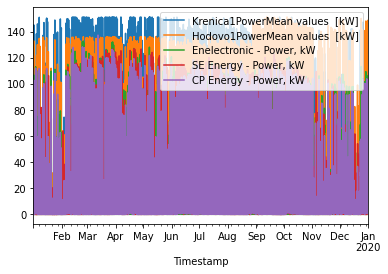

In [55]:
file_total_2019[['Krenica1PowerMean values  [kW]','Hodovo1PowerMean values  [kW]','Enelectronic - Power, kW',"SE Energy - Power, kW","CP Energy - Power, kW"]].plot()

<AxesSubplot:xlabel='Month'>

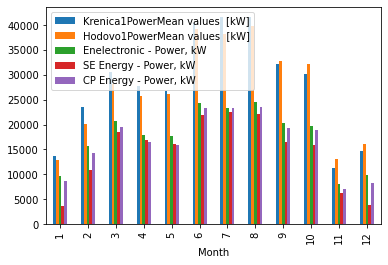

In [50]:
file_total_2019.groupby("Month")[['Krenica1PowerMean values  [kW]','Hodovo1PowerMean values  [kW]','Enelectronic - Power, kW',"SE Energy - Power, kW","CP Energy - Power, kW"]].sum().plot(kind="bar")

In [252]:
#file_total_2020.groupby("Month")[['Krenica1PowerMean values  [kW]','Hodovo1PowerMean values  [kW]','Enelectronic - Power, kW']].sum().plot(kind="bar")

In [253]:
#file_total_2021.groupby("Month")[['Krenica1PowerMean values  [kW]','Hodovo1PowerMean values  [kW]','Enelectronic - Power, kW']].sum().plot(kind="bar")

In [54]:
(file_total_2019["Krenica1PowerMean values  [kW]"].sum(axis=0)+file_total_2019["Hodovo1PowerMean values  [kW]"].sum(axis=0)+file_total_2019["Enelectronic - Power, kW"].sum(axis=0)+file_total_2019["SE Energy - Power, kW"].sum(axis=0)+file_total_2019["CP Energy - Power, kW"].sum(axis=0))/1000000

1.2438157760000002

In [251]:
#(file_total_2020["Krenica1PowerMean values  [kW]"].sum(axis=0)+file_total_2020["Hodovo1PowerMean values  [kW]"].sum(axis=0)+file_total_2020["Enelectronic - Power, kW"].sum(axis=0))/1000000

In [252]:
#(file_total_2021["Krenica1PowerMean values  [kW]"].sum(axis=0)+file_total_2021["Hodovo1PowerMean values  [kW]"].sum()+file_total_2021["Enelectronic - Power, kW"].sum())/1000000

In [253]:
file_total_2019["Krenica1PowerMean values  [kW]"].sum(axis=0)

334240.464

In [254]:
file_total_2019["Hodovo1PowerMean values  [kW]"].sum(axis=0)

324230.30199999997